<img src='loan_approved_hero_image.jpg' style="max-width: 100%"></img>

> <h1 style="color: blue">Import And Explore Data</h1>

In [65]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [66]:
# utility functions
def outliers(col):
    data_mean, data_std = np.mean(col), np.std(col)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    ls = col.index[(col<lower) | (col>upper)]
    return ls

def remove(df,ls):
    ls=sorted(set(ls))
    df.drop(ls,inplace = True)


In [67]:
df = pd.read_csv(r'D:\Data\Loan prediction\train_u6lujuX_CVtuZ9i.csv')

In [68]:
head = df.head()

In [69]:
def color_negative_red(val):
    color = 'red' if type(val) in [int,float] and val < 1 else 'black'
    return f'color: {color}'

head.style.applymap(color_negative_red)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [71]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [73]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


> <h1 style="color: blue">Univariate Analysis</h1>

> Gender

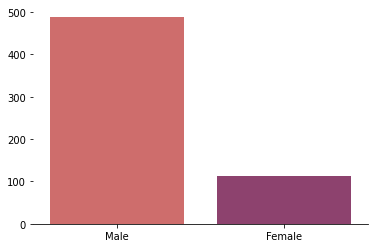

In [74]:
Gender_val = df['Gender'].value_counts()
sns.barplot(x = Gender_val.index , y = Gender_val.values , palette='flare')
sns.despine(left=True)

In [75]:
df['Gender'] = df['Gender'].map({'Male':1 , 'Femail':0})

In [76]:
df['Gender'].isna().sum()

125

In [77]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

> Married

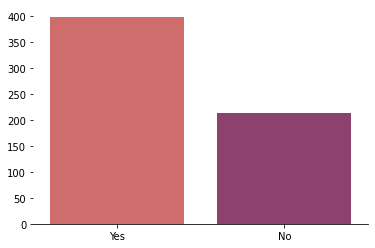

In [78]:
Married_val = df['Married'].value_counts()
sns.barplot(x = Married_val.index , y = Married_val.values, palette='flare')
sns.despine(left=True)

In [79]:
df['Married'] = df['Married'].map({'Yes':1 , 'No':0})

In [80]:
df['Married'].isna().sum()

3

In [81]:
df['Married'].fillna(df['Married'].mode()[0],inplace =True)

> Dependents

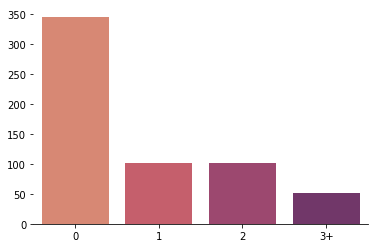

In [82]:
Dependents_val = df['Dependents'].value_counts()
sns.barplot(x = Dependents_val.index , y = Dependents_val.values, palette='flare')
sns.despine(left=True)


In [83]:
df['Dependents'].isna().sum()

15

In [84]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [85]:
df['Dependents'] = df['Dependents'].map({'0':0 ,'1':1 , '2':2 , '3+':3}) 

> Education

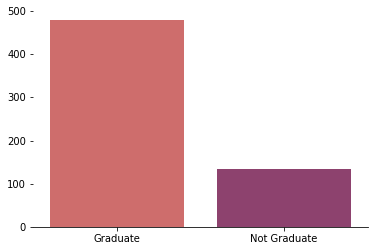

In [86]:
Education_val = df['Education'].value_counts()
sns.barplot(x = Education_val.index , y = Education_val.values, palette='flare')
sns.despine(left=True)

In [87]:
df['Education'] = df['Education'].map({'Graduate':1 , 'Not Graduate':0})

In [88]:
df['Education'].isna().sum()

0

> Self_Employed

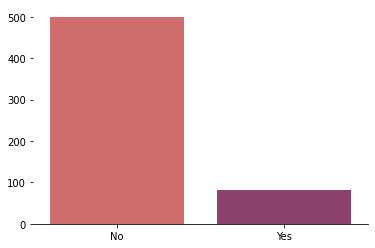

In [89]:
Self_Employed_val = df['Self_Employed'].value_counts()
sns.barplot(x = Self_Employed_val.index , y = Self_Employed_val.values, palette='flare')
sns.despine(left=True)

In [90]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1 , 'No':0})

In [91]:
df['Self_Employed'].isna().sum()

32

In [92]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)

> TotalIncome

In [93]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
del df['ApplicantIncome']
del df['CoapplicantIncome']

> ApplicantIncome

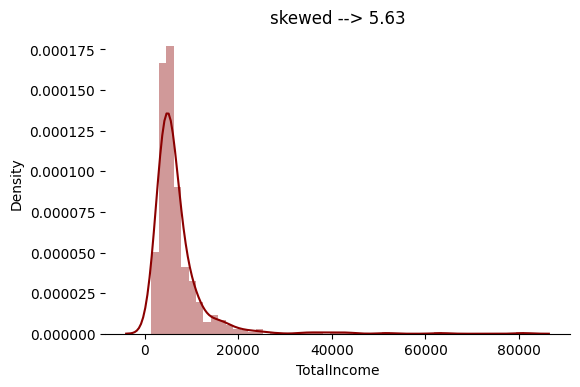

In [94]:
skew = round(df['TotalIncome'].skew(),2)
fig,ax = plt.subplots( dpi=100)
sns.despine(left=True)
sns.distplot(df['TotalIncome'],color = 'darkred' , ax=ax)
ax.set_title(f'skewed --> {skew}')
plt.show()

In [95]:
ls = outliers(df['TotalIncome'])
remove(df, ls)

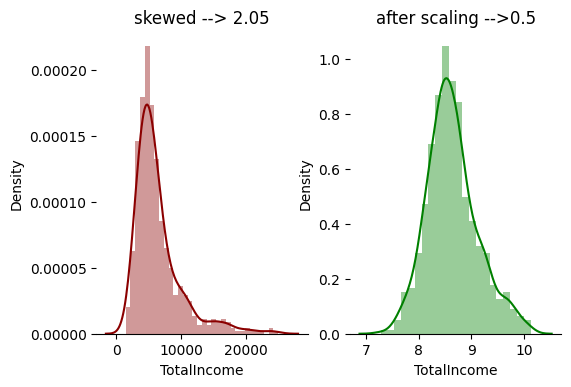

In [96]:
skew = round(df['TotalIncome'].skew(),2)
fig,ax = plt.subplots(1,2, dpi=100)
sns.despine(left=True)
sns.distplot(df['TotalIncome'],color = 'darkred' , ax=ax[0])
# log transformation
df['TotalIncome'] = np.log(df['TotalIncome'])
skew2 = round(df['TotalIncome'].skew(),2)
sns.distplot(df['TotalIncome'],color = 'g' , ax=ax[1])
ax[0].set_title(f'skewed --> {skew}')
ax[1].set_title(f'after scaling -->{skew2}')
plt.show()

In [97]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1.0,0.0,0,1,0.0,NaN,360.0,1.0,Urban,Y,8.674026
1,LP001003,1.0,1.0,1,1,0.0,128.0,360.0,1.0,Rural,N,8.714568
2,LP001005,1.0,1.0,0,1,1.0,66.0,360.0,1.0,Urban,Y,8.006368
3,LP001006,1.0,1.0,0,0,0.0,120.0,360.0,1.0,Urban,Y,8.505323
4,LP001008,1.0,0.0,0,1,0.0,141.0,360.0,1.0,Urban,Y,8.699515


> LoanAmount

In [98]:
# LoanAmount values in thousands
df['LoanAmount'] = df['LoanAmount'] *1000

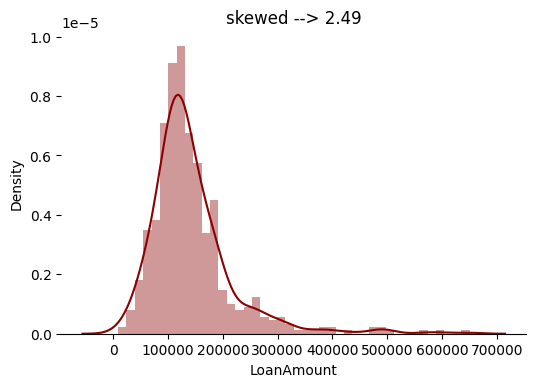

In [99]:
skew = round(df['LoanAmount'].skew(),2)
fig,ax = plt.subplots( dpi=100)
sns.despine(left=True)
sns.distplot(df['LoanAmount'],color = 'darkred' , ax=ax)
ax.set_title(f'skewed --> {skew}')
plt.show()

In [100]:
df['LoanAmount'].isna().sum()

22

In [101]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace = True)

In [102]:
ls = outliers(df['LoanAmount'])
remove(df, ls)

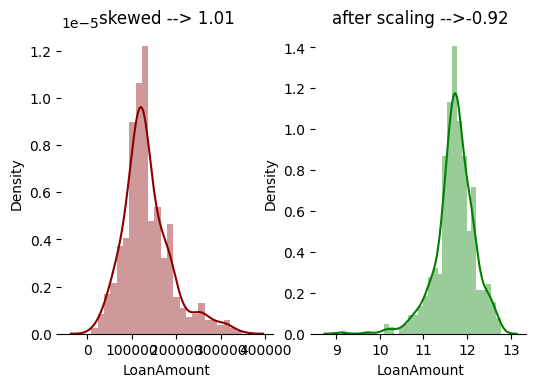

In [103]:
skew = round(df['LoanAmount'].skew(),2)
fig,ax = plt.subplots(1,2, dpi=100)
sns.despine(left=True)
sns.distplot(df['LoanAmount'],color = 'darkred' , ax=ax[0])
# log transformation
df['LoanAmount'] = np.log(df['LoanAmount'])
skew2 = round(df['LoanAmount'].skew(),2)
sns.distplot(df['LoanAmount'],color = 'g' , ax=ax[1])
ax[0].set_title(f'skewed --> {skew}')
ax[1].set_title(f'after scaling -->{skew2}')
plt.show()

> Loan_Amount_Term

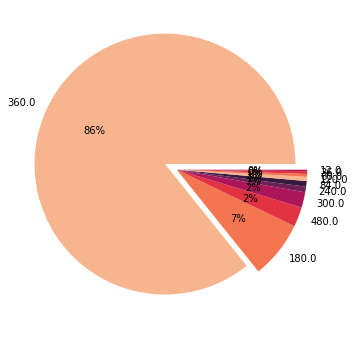

In [104]:
Loan_Amount_Term_val = df['Loan_Amount_Term'].value_counts().sort_values(ascending=False)
fig,ax = plt.subplots(figsize=(30,6))
palette_color = sns.color_palette('rocket_r')
sns.despine(left=True)
explode = [0.1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ]
ax.pie(data = Loan_Amount_Term_val ,x= Loan_Amount_Term_val.values ,labels= Loan_Amount_Term_val.index , colors=palette_color, explode=explode, autopct='%.0f%%')
# plt.suptitle("top5 locations that have jobs",size=20)
plt.show()

In [105]:
df['Loan_Amount_Term'].isna().sum()

14

In [106]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

> Credit_History

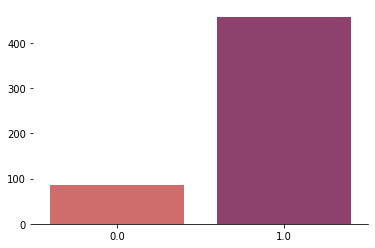

In [107]:
Credit_History_val = df['Credit_History'].value_counts()
sns.barplot(x = Credit_History_val.index , y = Credit_History_val.values, palette='flare')
sns.despine(left=True)

In [108]:
df['Credit_History'].isna().sum()

47

In [109]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

> Loan_Status

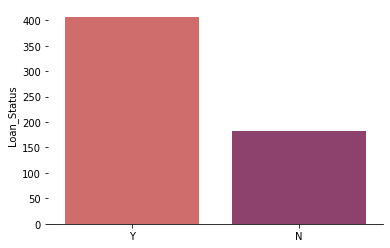

In [110]:
Loan_Status_val = df['Loan_Status'].value_counts()
sns.barplot(x= Loan_Status_val.index , y = Loan_Status_val, palette='flare')
sns.despine(left=True)

In [111]:
df['Loan_Status'] =  df['Loan_Status'].map({'Y':1 , 'N':0})

> Property_Area

In [112]:
df['Property_Area'].value_counts()

Semiurban    224
Urban        195
Rural        171
Name: Property_Area, dtype: int64

In [113]:
df.groupby('Property_Area')['Credit_History'].sum()

Property_Area
Rural        145.0
Semiurban    196.0
Urban        164.0
Name: Credit_History, dtype: float64

In [114]:
df['Property_Area'] = df['Property_Area'].map({'Rural':0 , 'Urban':1 , 'Semiurban':2})

In [115]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1.0,0.0,0,1,0.0,11.751942,360.0,1.0,1,1,8.674026
1,LP001003,1.0,1.0,1,1,0.0,11.759786,360.0,1.0,0,0,8.714568
2,LP001005,1.0,1.0,0,1,1.0,11.097410,360.0,1.0,1,1,8.006368
3,LP001006,1.0,1.0,0,0,0.0,11.695247,360.0,1.0,1,1,8.505323
4,LP001008,1.0,0.0,0,1,0.0,11.856515,360.0,1.0,1,1,8.699515


In [116]:
df['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           590 non-null    object 
 1   Gender            590 non-null    float64
 2   Married           590 non-null    float64
 3   Dependents        590 non-null    int64  
 4   Education         590 non-null    int64  
 5   Self_Employed     590 non-null    float64
 6   LoanAmount        590 non-null    float64
 7   Loan_Amount_Term  590 non-null    float64
 8   Credit_History    590 non-null    float64
 9   Property_Area     590 non-null    int64  
 10  Loan_Status       590 non-null    int64  
 11  TotalIncome       590 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 59.9+ KB


> <h1 style="color: blue">Modeling</h1>

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier

In [119]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [125]:
del df['Loan_ID']
X = df.drop('Loan_Status' , axis = 1 )
y = df['Loan_Status']
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102)

In [126]:
models={
    "Logistic Regression":LogisticRegressionCV(multi_class='multinomial'),
#     "SVR":SVR(multi_class="crammer_singer"),
    "Decision Tree": DecisionTreeClassifier(),
#     "AdaBoostClassifier" : AdaBoostClassifier(),
#     "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
#     "HistGradientBoostingClassifier" : HistGradientBoostingClassifier(),
#     "KNeighborsClassifier":KNeighborsClassifier(),
#     "XGBClassifier":XGBClassifier()
}

In [127]:
accuracies = {
    "Name":[],
    "Train_score":[],
    "Test_score":[],
    "precision_score":[],
    "recall_score":[],
    "f1_score":[]
}

In [128]:
for name,model in models.items():
    model.fit(X_train,y_train)
    accuracies['Name'].append(name)
    accuracies['Train_score'].append(model.score(X_train,y_train))
    accuracies['Test_score'].append(model.score(X_test,y_test))
    y_pred = model.predict(X_test)
    accuracies['precision_score'].append(precision_score(y_pred,y_test,average='weighted'))
    accuracies['recall_score'].append(recall_score(y_pred,y_test,average='weighted'))
    accuracies['f1_score'].append(f1_score(y_pred,y_test,average='weighted'))

In [129]:
df_score = pd.DataFrame(accuracies)
df_score

,Name,Train_score,Test_score,precision_score,recall_score,f1_score
0,Logistic Regression,0.811138,0.819209,0.907943,0.819209,0.843408
1,Decision Tree,1.000000,0.717514,0.725090,0.717514,0.720940
2,RandomForestClassifier,1.000000,0.802260,0.851126,0.802260,0.817377
